In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200
pd.set_option('display.max_columns', 5000)

In [71]:
y_train=pd.read_csv("y_trainS.csv")
y_train.drop("Unnamed: 0", inplace = True, axis = 1)
y_train = y_train.values
y_test=pd.read_csv("y_testS.csv")
y_test.drop("Unnamed: 0", inplace = True, axis = 1)
y_test = y_test.values

X_train=pd.read_csv("X_train_impute.csv")
X_train= X_train.apply(lambda x: x.fillna(x.median()),axis=0)
X_train.drop("Unnamed: 0", inplace = True, axis = 1)
X_train = X_train.values

X_test=pd.read_csv("X_test_impute.csv")
X_test= X_test.apply(lambda x: x.fillna(x.median()),axis=0)
X_test.drop("Unnamed: 0", inplace = True, axis = 1)
X_test = X_test.values

test=pd.read_csv("test_impute.csv")
test = test.apply(lambda x: x.fillna(x.median()),axis=0)
test.drop("Unnamed: 0", inplace = True, axis = 1)


In [37]:
X_train.shape

(11072, 53)

In [18]:
data = pd.read_csv("train_los.csv")
test = pd.read_csv("test_los.csv")
submission = pd.read_csv("sample_sol_los.csv")

In [3]:
test["AGE"] = (pd.to_datetime(test["ADMITTIME"])- pd.to_datetime(test["DOB"])).dt.total_seconds()//3.154e+7
data["AGE"] = (pd.to_datetime(data["ADMITTIME"])- pd.to_datetime(data["DOB"])).dt.total_seconds()//3.154e+7
data["AGE"]

0        69.0
1        79.0
2        74.0
3        71.0
4        85.0
         ... 
13835    69.0
13836    86.0
13837    88.0
13838    68.0
13839    67.0
Name: AGE, Length: 13840, dtype: float64

In [4]:
data.head(10)

,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,ADMITTIME,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS,AGE
0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,F,1938-11-23,2008-06-15,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761,69.0
1,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,F,1929-04-30,2008-09-12,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654,79.0
2,86233,184606,237514,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,100.0,96.931034,116.0,183.0,142.166667,F,1935-05-15,2009-05-21,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,LEFT LUNG CANCER/SDA,1625,SICU,9.8213,74.0
3,53787,174772,244413,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,100.0,92.913043,233.0,484.0,361.000000,F,1937-01-14,2008-02-06,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,ASTHMA;COPD EXACERBATION,49322,MICU,1.0230,71.0
4,99384,168087,298919,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,99.0,94.600000,85.0,161.0,112.000000,M,1924-08-05,2010-02-24,EMERGENCY,Medicare,BUDDHIST,WIDOWED,WHITE,PULMONARY EMBOLISM,41511,TSICU,1.3265,85.0
5,70776,183743,278855,94.0,109.0,101.722222,128.0,151.0,139.176471,60.0,82.0,72.705882,78.0,109.0,89.941176,11.0,27.0,22.333333,36.333333,36.555556,36.458333,92.0,97.0,94.166667,142.0,173.0,154.666667,F,1937-11-30,2010-04-21,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,CORONARY ARTERY DISEASE;AORTIC STENOSIS,4241,CSRU,0.6561,72.0
6,68623,179098,207692,56.0,77.0,63.920000,83.0,148.0,115.440000,46.0,91.0,61.160000,59.0,98.0,75.769231,16.0,28.0,21.720000,35.722222,37.777778,36.638889,94.0,100.0,98.720000,137.0,164.0,150.500000,F,1918-08-09,2009-12-31,EMERGENCY,Medicare,NOT SPECIFIED,WIDOWED,WHITE,CHEST PAIN,41011,CCU,3.0524,91.0
7,94431,156573,277837,52.0,127.0,95.157895,92.0,144.0,118.714286,41.0,67.0,55.250000,59.0,97.0,74.423077,9.0,31.0,19.076923,35.500000,38.500000,36.898810,95.0,100.0,97.473684,78.0,185.0,135.636364,F,1933-03-28,2008-12-02,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,MITRAL VALVE DISORDER\MITRAL VALVE REPLACEMENT,3941,CSRU,1.2737,75.0
8,76652,103471,231233,59.0,91.0,73.451613,105.0,149.0,120.925926,46.0,117.0,60.370370,60.0,124.0,74.481481,9.0,21.0,15.419355,36.833333,37.444444,37.063492,97.0,100.0,98.600000,97.0,125.0,107.750000,M,1983-10-11,2008-02-04,EMERGENCY,Medicaid,CATHOLIC,SINGLE,WHITE,FACIAL FRACTURES,85206,TSICU,1.2125,24.0
9,53782,190648,246339,72.0,100.0,88.555556,81.0,150.0,101.428571,47.0,69.0,53.936508,52.0,93.0,67.031746,10.0,36.0,16.602941,NaN,NaN,NaN,94.0,100.0,99.089286,62.0,164.0,112.700000,M,1927-01-27,2010-03-31,EMERGENCY,Medicare,CATHOLIC,SINGLE,WHITE,CORONARY ARTERY DISEASE,41401,CSRU,4.9430,83.0


In [5]:
"""data["NAN"] = (1*data.isna()).sum(axis = 1)
test["NAN"] = (1*data.isna()).sum(axis = 1)""" #turns out that not having some data on some columns didnt have much predictive power - you can see sns plot later on (given you uncomment this and thingy later)

'data["NAN"] = (1*data.isna()).sum(axis = 1)\ntest["NAN"] = (1*data.isna()).sum(axis = 1)'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      13840 non-null  int64  
 1   hadm_id         13840 non-null  int64  
 2   icustay_id      13840 non-null  int64  
 3   HeartRate_Min   11177 non-null  float64
 4   HeartRate_Max   11177 non-null  float64
 5   HeartRate_Mean  11177 non-null  float64
 6   SysBP_Min       11164 non-null  float64
 7   SysBP_Max       11164 non-null  float64
 8   SysBP_Mean      11164 non-null  float64
 9   DiasBP_Min      11164 non-null  float64
 10  DiasBP_Max      11164 non-null  float64
 11  DiasBP_Mean     11164 non-null  float64
 12  MeanBP_Min      11177 non-null  float64
 13  MeanBP_Max      11177 non-null  float64
 14  MeanBP_Mean     11177 non-null  float64
 15  RespRate_Min    11175 non-null  float64
 16  RespRate_Max    11175 non-null  float64
 17  RespRate_Mean   11175 non-null 

In [7]:
important_guess = ["AGE","GENDER","ADMISSION_TYPE","INSURANCE", "MARITAL_STATUS", "ETHNICITY","Glucose_Max","FIRST_CAREUNIT","RELIGION", "TempC_Max",'SpO2_Max', "DiasBP_Max", "RespRate_Max", "SysBP_Max", "HeartRate_Max", "DIAGNOSIS", "ICD9_diagnosis"]
#max values are the values dangerous for health, I SUPPOSE

In [8]:
train = data[important_guess]
test = test[important_guess]

In [9]:
"""sns.countplot(x = "NAN", hue = "HOSPITAL_EXPIRE_FLAG", data = data)"""

'sns.countplot(x = "NAN", hue = "HOSPITAL_EXPIRE_FLAG", data = data)'

In [10]:
train.info(), test.info() #rerun later to chack if all nas are fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             13840 non-null  float64
 1   GENDER          13840 non-null  object 
 2   ADMISSION_TYPE  13840 non-null  object 
 3   INSURANCE       13840 non-null  object 
 4   MARITAL_STATUS  13386 non-null  object 
 5   ETHNICITY       13840 non-null  object 
 6   Glucose_Max     13696 non-null  float64
 7   FIRST_CAREUNIT  13840 non-null  object 
 8   RELIGION        13840 non-null  object 
 9   TempC_Max       10995 non-null  float64
 10  SpO2_Max        11167 non-null  float64
 11  DiasBP_Max      11164 non-null  float64
 12  RespRate_Max    11175 non-null  float64
 13  SysBP_Max       11164 non-null  float64
 14  HeartRate_Max   11177 non-null  float64
 15  DIAGNOSIS       13840 non-null  object 
 16  ICD9_diagnosis  13840 non-null  object 
dtypes: float64(8), object(9)
memory

(None, None)

In [11]:
set(train["MARITAL_STATUS"])

{'DIVORCED',
 'LIFE PARTNER',
 'MARRIED',
 'SEPARATED',
 'SINGLE',
 'UNKNOWN (DEFAULT)',
 'WIDOWED',
 nan}

In [12]:
train["MARITAL_STATUS"] = train["MARITAL_STATUS"] .replace(np.nan, 'UNKNOWN (DEFAULT)', regex=True)
test["MARITAL_STATUS"] = test["MARITAL_STATUS"] .replace(np.nan, 'UNKNOWN (DEFAULT)', regex=True)

In [13]:
numerical = ['Glucose_Max','TempC_Max', 'DiasBP_Max', 'RespRate_Max', 'SysBP_Max', 'HeartRate_Max', 'SpO2_Max',  "AGE"]
cat = list(set(train.columns) - set(train[numerical].columns))

In [14]:
train[numerical] = train[numerical].apply(lambda x: x.fillna(x.median()),axis=0)
test[numerical] = test[numerical].apply(lambda x: x.fillna(x.median()),axis=0)

In [15]:
X = train.copy()
y = data["LOS"]
cat = list(set(X.columns) - set(X[numerical].columns))
cat

['ADMISSION_TYPE',
 'ICD9_diagnosis',
 'GENDER',
 'FIRST_CAREUNIT',
 'DIAGNOSIS',
 'ETHNICITY',
 'MARITAL_STATUS',
 'RELIGION',
 'INSURANCE']

In [16]:
set(X.columns) - set(test.columns)

set()

so i wanted to see how NN would deal with it. overall it seems it dealt better with the problem but in reality the encoding messed things up.

In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow import keras
from keras import regularizers
from keras.metrics import MeanAbsoluteError
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.model_selection import  train_test_split

In [18]:
Z = X.copy()

In [19]:
enc = TargetEncoder()
Z[cat] = enc.fit_transform(X[cat], data["LOS"]) 
test[cat] = enc.transform(test[cat]) 

In [20]:
test

,AGE,GENDER,ADMISSION_TYPE,INSURANCE,MARITAL_STATUS,ETHNICITY,Glucose_Max,FIRST_CAREUNIT,RELIGION,TempC_Max,SpO2_Max,DiasBP_Max,RespRate_Max,SysBP_Max,HeartRate_Max,DIAGNOSIS,ICD9_diagnosis
0,42.0,3.289668,3.422007,3.248860,3.345529,3.341394,103.0,3.175337,3.668717,36.611111,100.0,74.0,21.0,121.0,110.0,3.330470,3.330470
1,68.0,3.289668,3.422007,3.401610,3.905187,3.059834,346.0,3.175337,3.326334,36.888889,100.0,67.0,21.0,138.0,98.0,2.677487,6.971879
2,74.0,3.289668,2.733247,3.401610,3.275579,3.341394,139.0,3.709519,3.175227,39.500000,100.0,89.0,35.0,135.0,128.0,5.768645,4.762681
3,49.0,3.362139,3.422007,3.248860,3.250744,3.341394,142.0,3.175337,3.454709,36.944444,100.0,88.0,23.0,155.0,130.0,3.330470,1.735041
4,68.0,3.362139,3.422007,3.401610,3.345529,3.341394,204.0,3.563529,3.358457,38.333333,100.0,72.0,24.0,148.0,116.0,3.240731,3.330470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,82.0,3.289668,3.422007,3.401610,3.345529,3.341394,337.0,3.351365,3.668717,38.333333,100.0,75.0,20.0,144.0,111.0,3.330470,5.907542
12061,51.0,3.362139,3.422007,3.248860,3.807401,3.341394,356.0,3.175337,3.454709,40.388889,99.0,93.0,41.0,193.0,133.0,3.330470,6.745924
12062,36.0,3.362139,3.422007,3.085055,3.250744,2.055717,631.0,3.175337,3.454709,37.000000,98.0,113.0,36.0,195.0,116.0,2.372947,2.110124
12063,35.0,3.362139,3.422007,3.248860,3.250744,2.055717,170.0,3.175337,3.454709,36.888889,98.0,117.0,18.0,188.0,97.0,2.372947,1.794735


In [21]:
sc = RobustScaler()
Z = sc.fit_transform(Z) 
test = sc.transform(test) 


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2137)

In [23]:
Z = X_train.copy()

In [24]:
"""X_test[cat] = enc.transform(X_test[cat]) 
X_test =sc.transform(X_test)
X_train[cat] = enc.transform(X_train[cat])
X_train = sc.transform(X_train)"""

'X_test[cat] = enc.transform(X_test[cat]) \nX_test =sc.transform(X_test)\nX_train[cat] = enc.transform(X_train[cat])\nX_train = sc.transform(X_train)'

In [25]:
sc = RobustScaler()
enc = TargetEncoder()
X_train[cat] = enc.fit_transform(X_train[cat], y_train) 

X_test[cat] = enc.transform(X_test[cat])

X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [38]:
#i have tried few different architectures aswell but there was no much gain that would justify iteraring to find hyperparameters of deeper networks
def reg( optimizer="adam", dropout=0.1, init='uniform'):
    model = Sequential()  
    model.add(Dense(53, input_dim=53,kernel_initializer=init,  activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(53, kernel_initializer=init,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(53, kernel_initializer=init, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics = ["mae"])
    return model

In [39]:
reg().summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 53)                2862      
_________________________________________________________________
dropout_28 (Dropout)         (None, 53)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 53)                2862      
_________________________________________________________________
dropout_29 (Dropout)         (None, 53)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 53)                2862      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 54        
Total params: 8,640
Trainable params: 8,640
Non-trainable params: 0
___________________________________________________

In [46]:
model = reg()
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
346/346 [==============================] - 2s 4ms/step - loss: 2.3191 - mae: 2.3191 - val_loss: 1.8041 - val_mae: 1.8041
Epoch 2/10
346/346 [==============================] - 1s 4ms/step - loss: 1.8945 - mae: 1.8945 - val_loss: 1.7849 - val_mae: 1.7849
Epoch 3/10
346/346 [==============================] - 1s 3ms/step - loss: 1.8178 - mae: 1.8178 - val_loss: 1.7768 - val_mae: 1.7768
Epoch 4/10
346/346 [==============================] - 1s 4ms/step - loss: 1.8723 - mae: 1.8723 - val_loss: 1.7890 - val_mae: 1.7890
Epoch 5/10
346/346 [==============================] - 1s 3ms/step - loss: 1.8290 - mae: 1.8290 - val_loss: 1.7824 - val_mae: 1.7824
Epoch 6/10
346/346 [==============================] - 1s 4ms/step - loss: 1.8295 - mae: 1.8295 - val_loss: 1.8016 - val_mae: 1.8016
Epoch 7/10
346/346 [==============================] - 1s 4ms/step - loss: 1.8017 - mae: 1.8017 - val_loss: 1.7497 - val_mae: 1.7497
Epoch 8/10
346/346 [==============================] - 1s 3ms/step - loss: 1.

In [14]:
from sklearn.metrics import mean_absolute_error

In [43]:
X_test

array([[ 0.        ,  0.        ,  0.0069616 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.0069616 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26315789,  2.33333333,  0.75943261, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.68421053,  1.88888889,  2.03153666, ...,  1.        ,
         0.        ,  0.        ],
       [-0.73684211, -0.81481481, -0.93016825, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.68421053, -0.22222222,  0.42400555, ...,  1.        ,
         0.        ,  0.        ]])

In [47]:

mean_absolute_error(y_test, model.predict(X_test))

1.7532260580745782

In [63]:
pred =model.predict(test)
np.max(pred), np.min(pred), np.mean(pred), np.var(pred)

(694.70135, 0.0666527, 2.4314938, 41.800484)

In [64]:
my_submission = submission
my_submission["LOS"] =  pred
my_submission.head()

,icustay_id,LOS
0,221004,3.860512
1,296315,2.098957
2,245557,1.839853
3,287519,1.342118
4,231164,1.346149


In [65]:
my_submission.query("LOS > 20")

,icustay_id,LOS
116,249332,694.701355


In [80]:
test.describe()

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DIAGNOSIS,ICD9_diagnosis,num_stays,num_dis,dis,nthstay,AGE,NAN,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,FIRST_CAREUNIT_CCU,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU
count,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.00000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000,12065.000000
mean,0.037246,0.082614,0.049726,-0.013347,0.083895,0.088361,0.006703,0.096690,0.043669,-0.068701,0.197593,0.063880,-0.018545,0.099441,0.139680,-0.064882,0.097278,0.027472,-0.244923,-0.426937,-0.090300,0.118116,1.404042,0.496402,0.561376,-0.038408,0.074461,0.955077,0.250780,0.045090,0.595027,-0.034288,0.195607,0.134521,0.854455,0.011024,0.02901,0.100705,0.562785,0.298550,0.008952,0.066059,0.000414,0.467717,0.011521,0.281061,0.041194,0.132035,0.124575,0.148860,0.417157,0.188562,0.120845
std,0.782361,0.780558,0.733602,0.820708,0.758094,0.734934,0.784567,0.833065,0.774347,0.949215,1.095357,0.766111,0.883105,0.776583,0.789473,0.873208,0.831203,0.839679,1.819051,1.121064,0.883565,0.954008,116.709220,26.315960,0.496239,1.395376,0.761172,2.165440,0.826230,0.748276,1.405197,0.685961,1.233726,0.341226,0.352664,0.104417,0.16784,0.300950,0.496063,0.457641,0.094192,0.248395,0.020354,0.498977,0.106720,0.449536,0.198746,0.338543,0.330250,0.355966,0.493110,0.391176,0.325961
min,-3.578947,-2.259259,-2.344117,-4.095238,-3.290323,-3.184350,-2.666667,-2.565217,-3.184275,-3.744667,-2.920000,-3.331358,-2.750000,-1.875000,-1.869095,-25.333333,-6.917647,-8.621053,-22.750000,-33.000000,-16.220571,-2.857143,-1.371795,-1.779661,0.000000,-4.306218,-1.536750,0.000000,-1.333333,-2.885742,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.473684,-0.481481,-0.480596,-0.523810,-0.419355,-0.442004,-0.466667,-0.478261,-0.492476,-0.533333,-0.440000,-0.459604,-0.500000,-0.375000,-0.413440,-0.533333,-0.411765,-0.458726,-0.500000,0.000000,-0.494802,-0.428571,-0.384615,-0.377504,0.000000,-0.504654,-0.524269,0.000000,-0.333333,-0.433960,0.000000,-0.480000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-0.004783,-0.047619,0.000000,-0.001610,0.000000,0.000000,-0.038978,0.000000,0.000000,-0.018376,0.000000,0.000000,0.014899,0.000000,0.000000,-0.002632,0.000000,0.000000,0.012234,-0.028571,0.051282,0.026965,1.000000,0.000000,0.024951,0.000000,0.111111,0.080929,0.000000,0.040000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.526316,0.555556,0.528414,

In [58]:
#pred[pred>20] = 20
#pred = np.array([x if x <20 else 2 for x in pred])

In [60]:
pred

array([[3.8605115],
       [2.0989566],
       [1.8398529],
       ...,
       [2.9506993],
       [1.4549326],
       [1.3160126]], dtype=float32)

(0.0, 5.0)

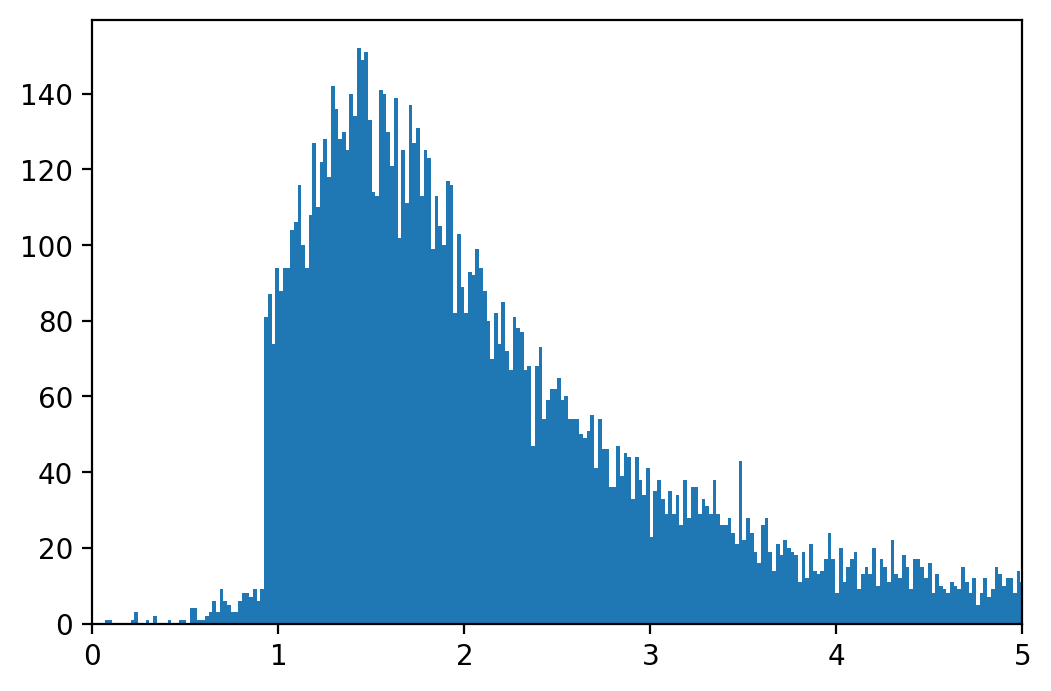

In [61]:
_=plt.hist(pred, bins = 1000)
plt.xlim(0,5)

In [62]:
def submit(model,X, name):
    my_submission = submission
    my_submission["LOS"] =  pred
    my_submission = my_submission.sort_values('icustay_id')
    my_submission.to_csv(name, index=False)
submit(pred, test, "regression_no_knn.csv")

In [35]:
y_train

1101      2.7016
5656      0.8959
10387     1.9279
13378    17.3109
4537      8.8864
          ...   
12368     2.9584
13260     1.7025
6829      5.7234
1724      1.9548
9702      1.8455
Name: LOS, Length: 9272, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
pip_reg = Pipeline(steps = [('preprocessor', TargetEncoder(cat)), ('scaler', RobustScaler()), ('reg', reg)])
pip_reg.fit(X_train, y_train)
mean_absolute_error(y_test, pip_reg.predict(X_test))

2.360404379199684

In [37]:
from sklearn.linear_model import ElasticNet
net = ElasticNet()
grid = {"reg__max_iter": [1, 5, 10],
                  "reg__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "reg__l1_ratio": np.arange(0.0, 1.0, 0.1)}
pip = Pipeline(steps = [('preprocessor', TargetEncoder(cat)), ('scaler', StandardScaler()), ('reg', net)])

grid_net = GridSearchCV(pip, grid, scoring='neg_mean_absolute_error', cv=5, n_jobs = -1, verbose = 1)
grid_net.fit(X_train, y_train)
best_net = grid_net.best_estimator_
mean_absolute_error(y_test, best_net.predict(X_test))

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    7.2s finished


2.3411713969711343

In [38]:
submit(best_net, test, "best_net.csv")

In [39]:
from sklearn.linear_model import Ridge
rid = Ridge()
grid = {"reg__alpha": np.logspace(-3, 1.5, 50)}
pip = Pipeline(steps = [('preprocessor', TargetEncoder(cat)), ('scaler', StandardScaler()), ('reg', rid)])
grid_rid = GridSearchCV(pip, grid, scoring='neg_mean_absolute_error', cv=5, n_jobs = -1, verbose = 1)
grid_rid.fit(X_train, y_train)
best_rid = grid_rid.best_estimator_
mean_absolute_error(y_test, best_rid.predict(X_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.9s finished


2.3596547734113167

In [40]:
submit(best_rid, test, "best_rid.csv")

In [41]:
from sklearn.linear_model import Lasso
las = Lasso()
grid = {"reg__alpha": np.logspace(-3, 1.5, 50)}
pip = Pipeline(steps = [('preprocessor', TargetEncoder(cat)), ('scaler', StandardScaler()), ('reg', rid)])
grid_las = GridSearchCV(pip, grid, scoring='neg_mean_absolute_error', cv=5, n_jobs = -1, verbose = 1)
grid_las.fit(X_train, y_train)
best_las = grid_las.best_estimator_
mean_absolute_error(y_test, best_las.predict(X_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.2s finished


2.3596547734113167

In [42]:
submit(best_las, test, "best_las.csv")

In [43]:
#ensemle of two models
def ensemble(model1,model2, X_test = X_test, y_test =y_test):
    from tqdm import tqdm
    best = 9999999999999999999
    for alpha in tqdm(np.linspace(0,1,200)):
        temp = mean_absolute_error(y_test, (alpha* (model1.predict(X_test)) + (1-alpha)*(model2.predict(X_test))))
        if temp < best:
            a = alpha
            best = temp

    return a, best

In [44]:
ensemble(pip_reg,best, X_test = X_test, y_test =y_test) 

  0%|          | 0/200 [00:00<?, ?it/s]

457/457 [==============================] - 0s 921us/step


  0%|          | 1/200 [00:00<01:34,  2.10it/s]

457/457 [==============================] - 0s 946us/step


  1%|          | 2/200 [00:00<01:34,  2.10it/s]

457/457 [==============================] - 0s 1ms/step


  2%|▏         | 3/200 [00:01<01:35,  2.06it/s]

457/457 [==============================] - 0s 978us/step


  2%|▏         | 4/200 [00:01<01:35,  2.05it/s]

457/457 [==============================] - 0s 799us/step


  2%|▎         | 5/200 [00:02<01:30,  2.16it/s]

457/457 [==============================] - 0s 952us/step


  3%|▎         | 6/200 [00:02<01:30,  2.13it/s]

457/457 [==============================] - 0s 1ms/step


  4%|▎         | 7/200 [00:03<01:34,  2.04it/s]

457/457 [==============================] - 0s 1ms/step


  4%|▍         | 8/200 [00:03<01:35,  2.01it/s]

457/457 [==============================] - 0s 853us/step


  4%|▍         | 9/200 [00:04<01:31,  2.10it/s]

457/457 [==============================] - 0s 820us/step


  5%|▌         | 10/200 [00:04<01:27,  2.18it/s]

457/457 [==============================] - 0s 871us/step


  6%|▌         | 11/200 [00:05<01:25,  2.20it/s]

457/457 [==============================] - 0s 897us/step


  6%|▌         | 12/200 [00:05<01:25,  2.21it/s]

457/457 [==============================] - 0s 800us/step


  6%|▋         | 13/200 [00:06<01:21,  2.28it/s]

457/457 [==============================] - 0s 989us/step


  7%|▋         | 14/200 [00:06<01:24,  2.19it/s]

457/457 [==============================] - 0s 908us/step


  8%|▊         | 15/200 [00:06<01:24,  2.20it/s]

457/457 [==============================] - 0s 840us/step


  8%|▊         | 16/200 [00:07<01:21,  2.24it/s]

457/457 [==============================] - 0s 1ms/step


  8%|▊         | 17/200 [00:07<01:26,  2.13it/s]

457/457 [==============================] - 0s 1ms/step


  9%|▉         | 18/200 [00:08<01:28,  2.06it/s]

457/457 [==============================] - 0s 961us/step


 10%|▉         | 19/200 [00:08<01:28,  2.06it/s]

457/457 [==============================] - 0s 875us/step


 10%|█         | 20/200 [00:09<01:24,  2.12it/s]

457/457 [==============================] - 0s 1ms/step


 10%|█         | 21/200 [00:09<01:27,  2.05it/s]

457/457 [==============================] - 0s 897us/step


 11%|█         | 22/200 [00:10<01:25,  2.09it/s]

457/457 [==============================] - 1s 1ms/step


 12%|█▏        | 23/200 [00:10<01:28,  2.01it/s]

457/457 [==============================] - 0s 1ms/step


 12%|█▏        | 24/200 [00:11<01:28,  1.99it/s]

457/457 [==============================] - 0s 910us/step


 12%|█▎        | 25/200 [00:11<01:25,  2.04it/s]

457/457 [==============================] - 0s 938us/step


 13%|█▎        | 26/200 [00:12<01:24,  2.07it/s]

457/457 [==============================] - 0s 895us/step


 14%|█▎        | 27/200 [00:12<01:21,  2.11it/s]

457/457 [==============================] - 0s 916us/step


 14%|█▍        | 28/200 [00:13<01:21,  2.12it/s]

457/457 [==============================] - 0s 1ms/step


 14%|█▍        | 29/200 [00:13<01:22,  2.06it/s]

457/457 [==============================] - 0s 974us/step


 15%|█▌        | 30/200 [00:14<01:26,  1.96it/s]

457/457 [==============================] - 0s 803us/step


 16%|█▌        | 31/200 [00:14<01:20,  2.09it/s]

457/457 [==============================] - 0s 923us/step


 16%|█▌        | 32/200 [00:15<01:19,  2.11it/s]

457/457 [==============================] - 0s 932us/step


 16%|█▋        | 33/200 [00:15<01:18,  2.12it/s]

457/457 [==============================] - 0s 819us/step


 17%|█▋        | 34/200 [00:16<01:15,  2.20it/s]

457/457 [==============================] - 0s 798us/step


 18%|█▊        | 35/200 [00:16<01:12,  2.28it/s]

457/457 [==============================] - 0s 825us/step


 18%|█▊        | 36/200 [00:16<01:10,  2.31it/s]

457/457 [==============================] - 0s 836us/step


 18%|█▊        | 37/200 [00:17<01:10,  2.32it/s]

457/457 [==============================] - 0s 803us/step


 19%|█▉        | 38/200 [00:17<01:08,  2.36it/s]

457/457 [==============================] - 0s 842us/step


 20%|█▉        | 39/200 [00:18<01:08,  2.35it/s]

457/457 [==============================] - 0s 958us/step


 20%|██        | 40/200 [00:18<01:10,  2.27it/s]

457/457 [==============================] - 0s 1ms/step


 20%|██        | 41/200 [00:19<01:13,  2.17it/s]

457/457 [==============================] - 1s 1ms/step


 21%|██        | 42/200 [00:19<01:17,  2.03it/s]

457/457 [==============================] - 1s 1ms/step


 22%|██▏       | 43/200 [00:20<01:20,  1.94it/s]

457/457 [==============================] - 0s 884us/step


 22%|██▏       | 44/200 [00:20<01:17,  2.01it/s]

457/457 [==============================] - 0s 873us/step


 22%|██▎       | 45/200 [00:21<01:14,  2.08it/s]

457/457 [==============================] - 0s 855us/step


 23%|██▎       | 46/200 [00:21<01:12,  2.14it/s]

457/457 [==============================] - 1s 1ms/step


 24%|██▎       | 47/200 [00:22<01:15,  2.03it/s]

457/457 [==============================] - 0s 811us/step


 24%|██▍       | 48/200 [00:22<01:11,  2.13it/s]

457/457 [==============================] - 0s 776us/step


 24%|██▍       | 49/200 [00:23<01:07,  2.24it/s]

457/457 [==============================] - 0s 1ms/step


 25%|██▌       | 50/200 [00:23<01:09,  2.16it/s]

457/457 [==============================] - 0s 950us/step


 26%|██▌       | 51/200 [00:23<01:09,  2.14it/s]

457/457 [==============================] - 0s 958us/step


 26%|██▌       | 52/200 [00:24<01:09,  2.13it/s]

457/457 [==============================] - 0s 965us/step


 26%|██▋       | 53/200 [00:24<01:09,  2.11it/s]

457/457 [==============================] - 0s 956us/step


 27%|██▋       | 54/200 [00:25<01:09,  2.10it/s]

457/457 [==============================] - 0s 1ms/step


 28%|██▊       | 55/200 [00:25<01:11,  2.04it/s]

457/457 [==============================] - 0s 1ms/step


 28%|██▊       | 56/200 [00:26<01:12,  1.98it/s]

457/457 [==============================] - 0s 947us/step


 28%|██▊       | 57/200 [00:26<01:11,  2.01it/s]

457/457 [==============================] - 0s 844us/step


 29%|██▉       | 58/200 [00:27<01:07,  2.10it/s]

457/457 [==============================] - 0s 993us/step


 30%|██▉       | 59/200 [00:27<01:08,  2.07it/s]

457/457 [==============================] - 0s 840us/step


 30%|███       | 60/200 [00:28<01:05,  2.15it/s]

457/457 [==============================] - 0s 798us/step


 30%|███       | 61/200 [00:28<01:02,  2.23it/s]

457/457 [==============================] - 0s 967us/step


 31%|███       | 62/200 [00:29<01:03,  2.18it/s]

457/457 [==============================] - 0s 989us/step


 32%|███▏      | 63/200 [00:29<01:04,  2.13it/s]

457/457 [==============================] - 0s 811us/step


 32%|███▏      | 64/200 [00:30<01:01,  2.22it/s]

457/457 [==============================] - 0s 1ms/step


 32%|███▎      | 65/200 [00:30<01:03,  2.14it/s]

457/457 [==============================] - 0s 904us/step


 33%|███▎      | 66/200 [00:31<01:02,  2.16it/s]

457/457 [==============================] - 0s 976us/step


 34%|███▎      | 67/200 [00:31<01:02,  2.11it/s]

457/457 [==============================] - 0s 868us/step


 34%|███▍      | 68/200 [00:32<01:01,  2.16it/s]

457/457 [==============================] - 0s 985us/step


 34%|███▍      | 69/200 [00:32<01:01,  2.12it/s]

457/457 [==============================] - 0s 864us/step


 35%|███▌      | 70/200 [00:32<00:59,  2.17it/s]

457/457 [==============================] - 0s 941us/step


 36%|███▌      | 71/200 [00:33<01:00,  2.15it/s]

457/457 [==============================] - 0s 1ms/step


 36%|███▌      | 72/200 [00:33<01:02,  2.04it/s]

457/457 [==============================] - 0s 884us/step


 36%|███▋      | 73/200 [00:34<01:00,  2.09it/s]

457/457 [==============================] - 0s 996us/step


 37%|███▋      | 74/200 [00:34<01:00,  2.07it/s]

457/457 [==============================] - 1s 1ms/step


 38%|███▊      | 75/200 [00:35<01:06,  1.87it/s]

457/457 [==============================] - 0s 972us/step


 38%|███▊      | 76/200 [00:36<01:05,  1.90it/s]

457/457 [==============================] - 0s 818us/step


 38%|███▊      | 77/200 [00:36<01:00,  2.03it/s]

457/457 [==============================] - 0s 798us/step


 39%|███▉      | 78/200 [00:36<00:56,  2.15it/s]

457/457 [==============================] - 0s 807us/step


 40%|███▉      | 79/200 [00:37<00:54,  2.23it/s]

457/457 [==============================] - 0s 912us/step


 40%|████      | 80/200 [00:37<00:54,  2.22it/s]

457/457 [==============================] - 0s 866us/step


 40%|████      | 81/200 [00:38<00:53,  2.23it/s]

457/457 [==============================] - 0s 807us/step


 41%|████      | 82/200 [00:38<00:51,  2.30it/s]

457/457 [==============================] - 0s 822us/step


 42%|████▏     | 83/200 [00:39<00:50,  2.33it/s]

457/457 [==============================] - 0s 950us/step


 42%|████▏     | 84/200 [00:39<00:51,  2.24it/s]

457/457 [==============================] - 0s 864us/step


 42%|████▎     | 85/200 [00:39<00:51,  2.25it/s]

457/457 [==============================] - 0s 1ms/step


 43%|████▎     | 86/200 [00:40<00:53,  2.13it/s]

457/457 [==============================] - 0s 904us/step


 44%|████▎     | 87/200 [00:40<00:52,  2.15it/s]

457/457 [==============================] - 0s 906us/step


 44%|████▍     | 88/200 [00:41<00:51,  2.16it/s]

457/457 [==============================] - 0s 807us/step


 44%|████▍     | 89/200 [00:41<00:49,  2.24it/s]

457/457 [==============================] - 0s 853us/step


 45%|████▌     | 90/200 [00:42<00:48,  2.26it/s]

457/457 [==============================] - 0s 860us/step


 46%|████▌     | 91/200 [00:42<00:47,  2.27it/s]

457/457 [==============================] - 0s 925us/step


 46%|████▌     | 92/200 [00:43<00:48,  2.24it/s]

457/457 [==============================] - 0s 982us/step


 46%|████▋     | 93/200 [00:43<00:49,  2.16it/s]

457/457 [==============================] - 0s 818us/step


 47%|████▋     | 94/200 [00:44<00:47,  2.23it/s]

457/457 [==============================] - 0s 969us/step


 48%|████▊     | 95/200 [00:44<00:48,  2.17it/s]

457/457 [==============================] - 0s 976us/step


 48%|████▊     | 96/200 [00:45<00:48,  2.14it/s]

457/457 [==============================] - 0s 1ms/step


 48%|████▊     | 97/200 [00:45<00:50,  2.05it/s]

457/457 [==============================] - 1s 1ms/step


 49%|████▉     | 98/200 [00:46<00:52,  1.95it/s]

457/457 [==============================] - 0s 796us/step


 50%|████▉     | 99/200 [00:46<00:48,  2.08it/s]

457/457 [==============================] - 0s 794us/step


 50%|█████     | 100/200 [00:46<00:45,  2.19it/s]

457/457 [==============================] - 0s 798us/step


 50%|█████     | 101/200 [00:47<00:43,  2.27it/s]

457/457 [==============================] - 0s 979us/step


 51%|█████     | 102/200 [00:47<00:44,  2.20it/s]

457/457 [==============================] - 0s 816us/step


 52%|█████▏    | 103/200 [00:48<00:42,  2.27it/s]

457/457 [==============================] - 0s 846us/step


 52%|█████▏    | 104/200 [00:48<00:41,  2.29it/s]

457/457 [==============================] - 0s 958us/step


 52%|█████▎    | 105/200 [00:49<00:42,  2.22it/s]

457/457 [==============================] - 0s 1ms/step


 53%|█████▎    | 106/200 [00:49<00:44,  2.12it/s]

457/457 [==============================] - 0s 976us/step


 54%|█████▎    | 107/200 [00:50<00:44,  2.10it/s]

457/457 [==============================] - 0s 937us/step


 54%|█████▍    | 108/200 [00:50<00:43,  2.10it/s]

457/457 [==============================] - 1s 1ms/step


 55%|█████▍    | 109/200 [00:51<00:47,  1.93it/s]

457/457 [==============================] - 1s 1ms/step


 55%|█████▌    | 110/200 [00:51<00:47,  1.89it/s]

457/457 [==============================] - 0s 936us/step


 56%|█████▌    | 111/200 [00:52<00:45,  1.94it/s]

457/457 [==============================] - 0s 932us/step


 56%|█████▌    | 112/200 [00:52<00:44,  2.00it/s]

457/457 [==============================] - 0s 909us/step


 56%|█████▋    | 113/200 [00:53<00:42,  2.05it/s]

457/457 [==============================] - 0s 826us/step


 57%|█████▋    | 114/200 [00:53<00:40,  2.14it/s]

457/457 [==============================] - 0s 811us/step


 57%|█████▊    | 115/200 [00:54<00:38,  2.22it/s]

457/457 [==============================] - 0s 816us/step


 58%|█████▊    | 116/200 [00:54<00:36,  2.27it/s]

457/457 [==============================] - 0s 842us/step


 58%|█████▊    | 117/200 [00:55<00:39,  2.09it/s]

457/457 [==============================] - 0s 798us/step


 59%|█████▉    | 118/200 [00:55<00:37,  2.19it/s]

457/457 [==============================] - 0s 803us/step


 60%|█████▉    | 119/200 [00:55<00:35,  2.26it/s]

457/457 [==============================] - 0s 875us/step


 60%|██████    | 120/200 [00:56<00:35,  2.26it/s]

457/457 [==============================] - 0s 982us/step


 60%|██████    | 121/200 [00:56<00:36,  2.19it/s]

457/457 [==============================] - 0s 841us/step


 61%|██████    | 122/200 [00:57<00:35,  2.22it/s]

457/457 [==============================] - 0s 844us/step


 62%|██████▏   | 123/200 [00:57<00:34,  2.26it/s]

457/457 [==============================] - 0s 1ms/step


 62%|██████▏   | 124/200 [00:58<00:35,  2.17it/s]

457/457 [==============================] - 0s 805us/step


 62%|██████▎   | 125/200 [00:58<00:33,  2.24it/s]

457/457 [==============================] - 0s 967us/step


 63%|██████▎   | 126/200 [00:59<00:33,  2.19it/s]

457/457 [==============================] - 0s 829us/step


 64%|██████▎   | 127/200 [00:59<00:32,  2.24it/s]

457/457 [==============================] - 1s 1ms/step


 64%|██████▍   | 128/200 [00:59<00:34,  2.07it/s]

457/457 [==============================] - 1s 2ms/step


 64%|██████▍   | 129/200 [01:00<00:42,  1.67it/s]

457/457 [==============================] - 1s 1ms/step


 65%|██████▌   | 130/200 [01:01<00:41,  1.68it/s]

457/457 [==============================] - 0s 807us/step


 66%|██████▌   | 131/200 [01:01<00:37,  1.85it/s]

457/457 [==============================] - 0s 809us/step


 66%|██████▌   | 132/200 [01:02<00:34,  1.99it/s]

457/457 [==============================] - 0s 906us/step


 66%|██████▋   | 133/200 [01:02<00:32,  2.05it/s]

457/457 [==============================] - 0s 908us/step


 67%|██████▋   | 134/200 [01:03<00:31,  2.09it/s]

457/457 [==============================] - 0s 895us/step


 68%|██████▊   | 135/200 [01:03<00:30,  2.12it/s]

457/457 [==============================] - 0s 995us/step


 68%|██████▊   | 136/200 [01:04<00:30,  2.08it/s]

457/457 [==============================] - 0s 901us/step


 68%|██████▊   | 137/200 [01:04<00:29,  2.12it/s]

457/457 [==============================] - 0s 859us/step


 69%|██████▉   | 138/200 [01:05<00:28,  2.17it/s]

457/457 [==============================] - 0s 893us/step


 70%|██████▉   | 139/200 [01:05<00:27,  2.19it/s]

457/457 [==============================] - 0s 810us/step


 70%|███████   | 140/200 [01:05<00:26,  2.25it/s]

457/457 [==============================] - 0s 850us/step


 70%|███████   | 141/200 [01:06<00:26,  2.26it/s]

457/457 [==============================] - 0s 882us/step


 71%|███████   | 142/200 [01:06<00:25,  2.26it/s]

457/457 [==============================] - 0s 1ms/step


 72%|███████▏  | 143/200 [01:07<00:26,  2.15it/s]

457/457 [==============================] - 0s 1ms/step


 72%|███████▏  | 144/200 [01:07<00:27,  2.06it/s]

457/457 [==============================] - 0s 860us/step


 72%|███████▎  | 145/200 [01:08<00:25,  2.12it/s]

457/457 [==============================] - 0s 851us/step


 73%|███████▎  | 146/200 [01:08<00:24,  2.17it/s]

457/457 [==============================] - 0s 893us/step


 74%|███████▎  | 147/200 [01:09<00:24,  2.19it/s]

457/457 [==============================] - 0s 839us/step


 74%|███████▍  | 148/200 [01:09<00:23,  2.23it/s]

457/457 [==============================] - 0s 912us/step


 74%|███████▍  | 149/200 [01:10<00:23,  2.21it/s]

457/457 [==============================] - 1s 1ms/step


 75%|███████▌  | 150/200 [01:10<00:25,  1.97it/s]

457/457 [==============================] - 1s 1ms/step


 76%|███████▌  | 151/200 [01:11<00:25,  1.92it/s]

457/457 [==============================] - 0s 820us/step


 76%|███████▌  | 152/200 [01:11<00:23,  2.04it/s]

457/457 [==============================] - 1s 1ms/step


 76%|███████▋  | 153/200 [01:12<00:25,  1.85it/s]

457/457 [==============================] - 0s 875us/step


 77%|███████▋  | 154/200 [01:12<00:23,  1.95it/s]

457/457 [==============================] - 0s 839us/step


 78%|███████▊  | 155/200 [01:13<00:21,  2.06it/s]

457/457 [==============================] - 0s 923us/step


 78%|███████▊  | 156/200 [01:13<00:21,  2.09it/s]

457/457 [==============================] - 0s 902us/step


 78%|███████▊  | 157/200 [01:14<00:20,  2.12it/s]

457/457 [==============================] - 0s 998us/step


 79%|███████▉  | 158/200 [01:14<00:20,  2.08it/s]

457/457 [==============================] - 0s 969us/step


 80%|███████▉  | 159/200 [01:15<00:19,  2.07it/s]

457/457 [==============================] - 0s 1ms/step


 80%|████████  | 160/200 [01:15<00:19,  2.03it/s]

457/457 [==============================] - 1s 1ms/step


 80%|████████  | 161/200 [01:16<00:20,  1.94it/s]

457/457 [==============================] - 1s 1ms/step


 81%|████████  | 162/200 [01:16<00:21,  1.77it/s]

457/457 [==============================] - 1s 1ms/step


 82%|████████▏ | 163/200 [01:17<00:21,  1.76it/s]

457/457 [==============================] - 0s 1ms/step


 82%|████████▏ | 164/200 [01:17<00:20,  1.78it/s]

457/457 [==============================] - 0s 1ms/step


 82%|████████▎ | 165/200 [01:18<00:19,  1.80it/s]

457/457 [==============================] - 1s 1ms/step


 83%|████████▎ | 166/200 [01:19<00:19,  1.78it/s]

457/457 [==============================] - 1s 1ms/step


 84%|████████▎ | 167/200 [01:19<00:19,  1.73it/s]

457/457 [==============================] - 0s 981us/step


 84%|████████▍ | 168/200 [01:20<00:17,  1.81it/s]

457/457 [==============================] - 0s 1ms/step


 84%|████████▍ | 169/200 [01:20<00:16,  1.84it/s]

457/457 [==============================] - 1s 1ms/step


 85%|████████▌ | 170/200 [01:21<00:16,  1.81it/s]

457/457 [==============================] - 0s 1ms/step


 86%|████████▌ | 171/200 [01:21<00:15,  1.83it/s]

457/457 [==============================] - 0s 1ms/step


 86%|████████▌ | 172/200 [01:22<00:15,  1.86it/s]

457/457 [==============================] - 1s 1ms/step


 86%|████████▋ | 173/200 [01:22<00:15,  1.78it/s]

457/457 [==============================] - 1s 1ms/step


 87%|████████▋ | 174/200 [01:23<00:15,  1.67it/s]

457/457 [==============================] - 0s 977us/step


 88%|████████▊ | 175/200 [01:24<00:14,  1.76it/s]

457/457 [==============================] - 0s 811us/step


 88%|████████▊ | 176/200 [01:24<00:12,  1.92it/s]

457/457 [==============================] - 0s 849us/step


 88%|████████▊ | 177/200 [01:24<00:11,  2.03it/s]

457/457 [==============================] - 0s 820us/step


 89%|████████▉ | 178/200 [01:25<00:10,  2.12it/s]

457/457 [==============================] - 0s 842us/step


 90%|████████▉ | 179/200 [01:25<00:09,  2.17it/s]

457/457 [==============================] - 0s 851us/step


 90%|█████████ | 180/200 [01:26<00:09,  2.21it/s]

457/457 [==============================] - 0s 849us/step


 90%|█████████ | 181/200 [01:26<00:08,  2.25it/s]

457/457 [==============================] - 0s 807us/step


 91%|█████████ | 182/200 [01:27<00:07,  2.31it/s]

457/457 [==============================] - 0s 831us/step


 92%|█████████▏| 183/200 [01:27<00:07,  2.33it/s]

457/457 [==============================] - 0s 838us/step


 92%|█████████▏| 184/200 [01:27<00:06,  2.34it/s]

457/457 [==============================] - 0s 818us/step


 92%|█████████▎| 185/200 [01:28<00:06,  2.35it/s]

457/457 [==============================] - 0s 840us/step


 93%|█████████▎| 186/200 [01:28<00:05,  2.36it/s]

457/457 [==============================] - 0s 985us/step


 94%|█████████▎| 187/200 [01:29<00:05,  2.25it/s]

457/457 [==============================] - 0s 831us/step


 94%|█████████▍| 188/200 [01:29<00:05,  2.29it/s]

457/457 [==============================] - 0s 829us/step


 94%|█████████▍| 189/200 [01:30<00:04,  2.32it/s]

457/457 [==============================] - 0s 792us/step


 95%|█████████▌| 190/200 [01:30<00:04,  2.36it/s]

457/457 [==============================] - 0s 847us/step


 96%|█████████▌| 191/200 [01:30<00:03,  2.35it/s]

457/457 [==============================] - 0s 820us/step


 96%|█████████▌| 192/200 [01:31<00:03,  2.37it/s]

457/457 [==============================] - 0s 934us/step


 96%|█████████▋| 193/200 [01:31<00:03,  2.30it/s]

457/457 [==============================] - 0s 820us/step


 97%|█████████▋| 194/200 [01:32<00:02,  2.32it/s]

457/457 [==============================] - 0s 854us/step


 98%|█████████▊| 195/200 [01:32<00:02,  2.31it/s]

457/457 [==============================] - 0s 853us/step


 98%|█████████▊| 196/200 [01:33<00:01,  2.32it/s]

457/457 [==============================] - 0s 844us/step


 98%|█████████▊| 197/200 [01:33<00:01,  2.33it/s]

457/457 [==============================] - 0s 893us/step


 99%|█████████▉| 198/200 [01:33<00:00,  2.30it/s]

457/457 [==============================] - 0s 864us/step


100%|█████████▉| 199/200 [01:34<00:00,  2.30it/s]

457/457 [==============================] - 0s 879us/step


100%|██████████| 200/200 [01:34<00:00,  2.11it/s]


(0.01507537688442211, 2.052728905353041)

In [45]:
a= 0
my_submission = submission
my_submission["LOS"] =   (a* (model1.predict(X_test)) + (1-a)*(model2.predict(X_test)))
my_submission = my_submission.sort_values('icustay_id')
my_submission.to_csv("modelreg.csv", index=False)


NameError: name 'model1' is not defined